In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv("workout_fitness_tracker_data.csv")

In [2]:
df.head()

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

In [4]:
df = df.drop(['User ID'], axis=1)

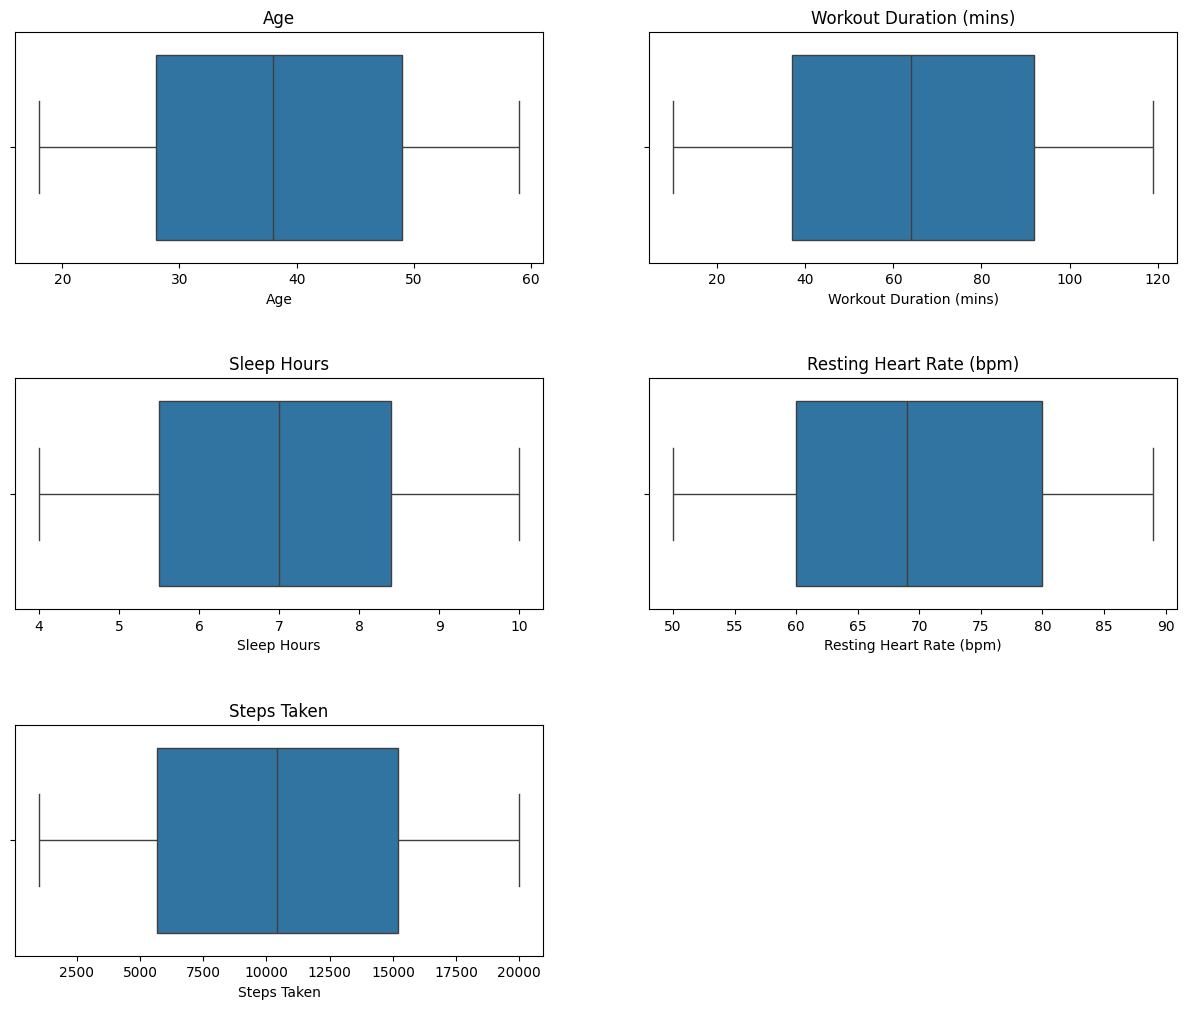

In [5]:
columns = ['Age', 'Workout Duration (mins)', 'Sleep Hours', 'Resting Heart Rate (bpm)', 'Steps Taken']

plt.figure(figsize=(15, 12))
for i, col in enumerate(columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.subplots_adjust(hspace=0.5)
plt.show()

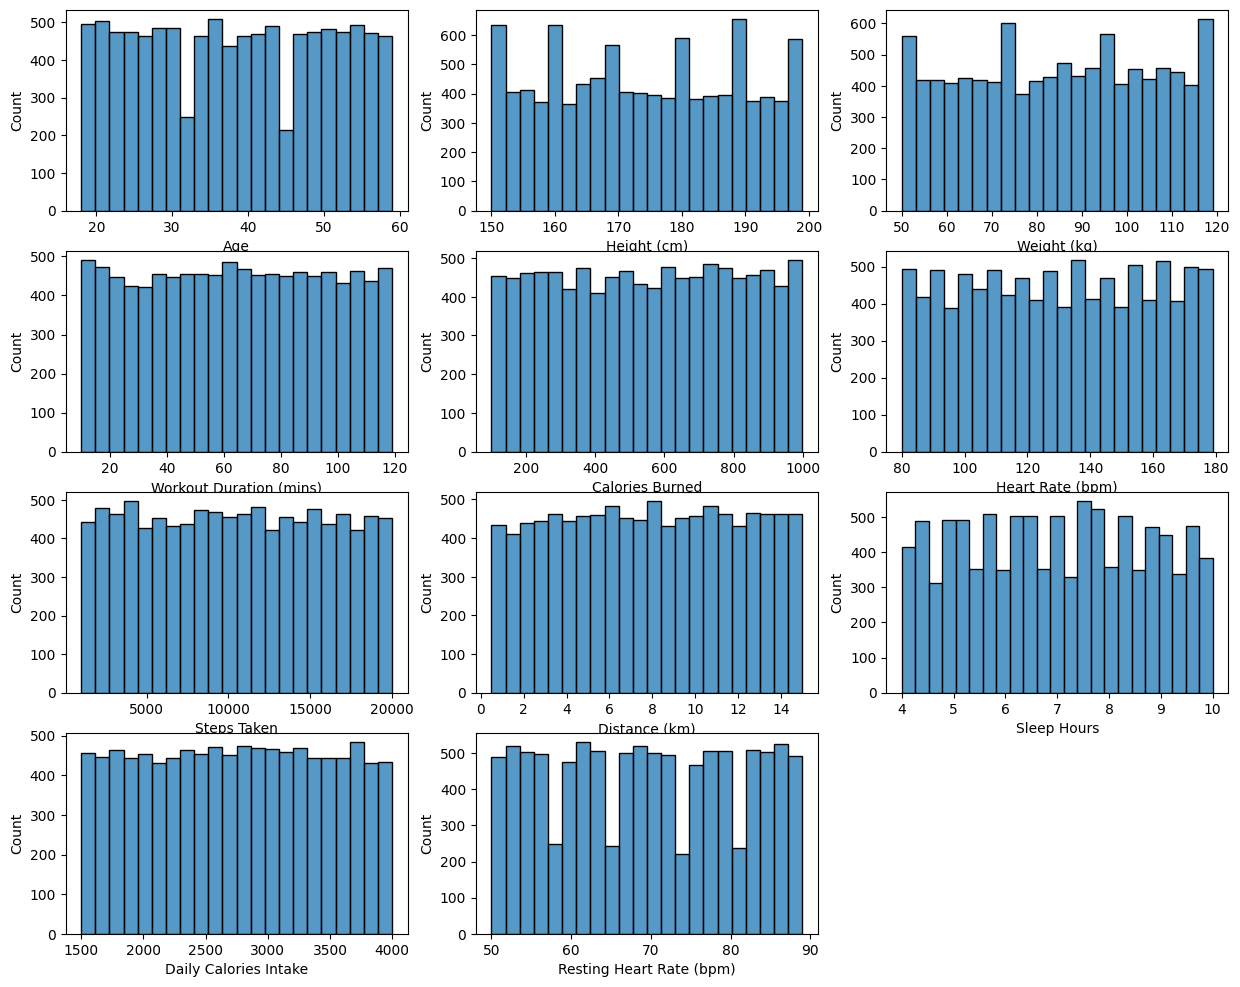

In [6]:
num_cols = ['Age','Height (cm)', 'Weight (kg)','Workout Duration (mins)',
            'Calories Burned','Heart Rate (bpm)', 'Steps Taken', 'Distance (km)',
            'Sleep Hours', 'Daily Calories Intake','Resting Heart Rate (bpm)']

plt.figure(figsize = (15,12))
for i, cols in enumerate(num_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(data = df,x = cols)
plt.show()

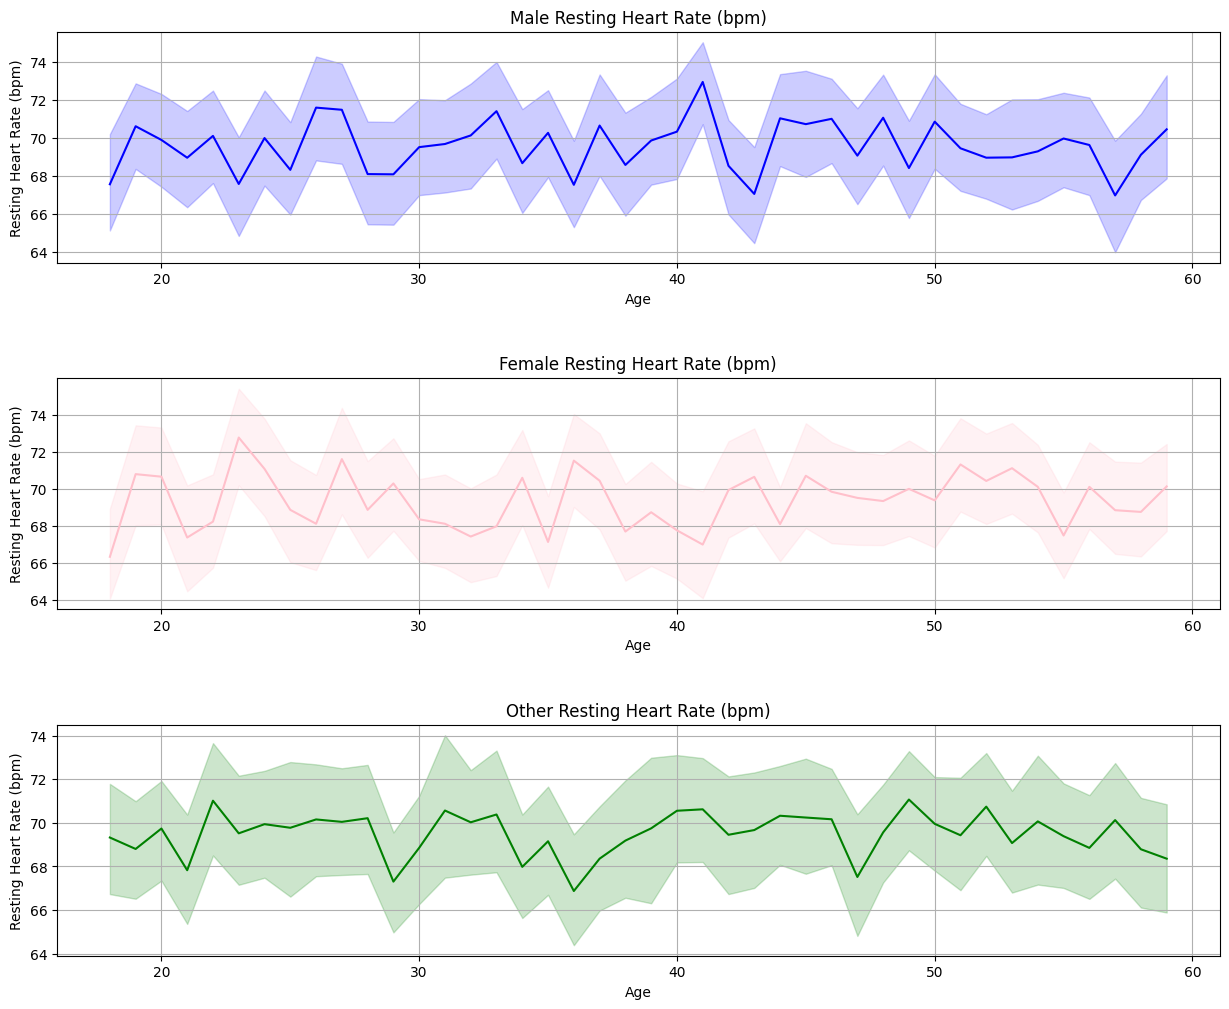

In [7]:
genders = ['Male', 'Female', 'Other']
colors = {'Male': 'blue', 'Female': 'pink', 'Other': 'green'}

plt.figure(figsize=(15, 12))
for i, gen in enumerate(genders):
    subset = df[df['Gender'] == gen]
    plt.subplot(3,1,i+1)
    sns.lineplot(x=subset['Age'], y=subset['Resting Heart Rate (bpm)'], color=colors[gen]) 
    plt.title(f'{gen} Resting Heart Rate (bpm)') 
    plt.grid(True)
    plt.subplots_adjust(hspace=0.5)
    
plt.show()

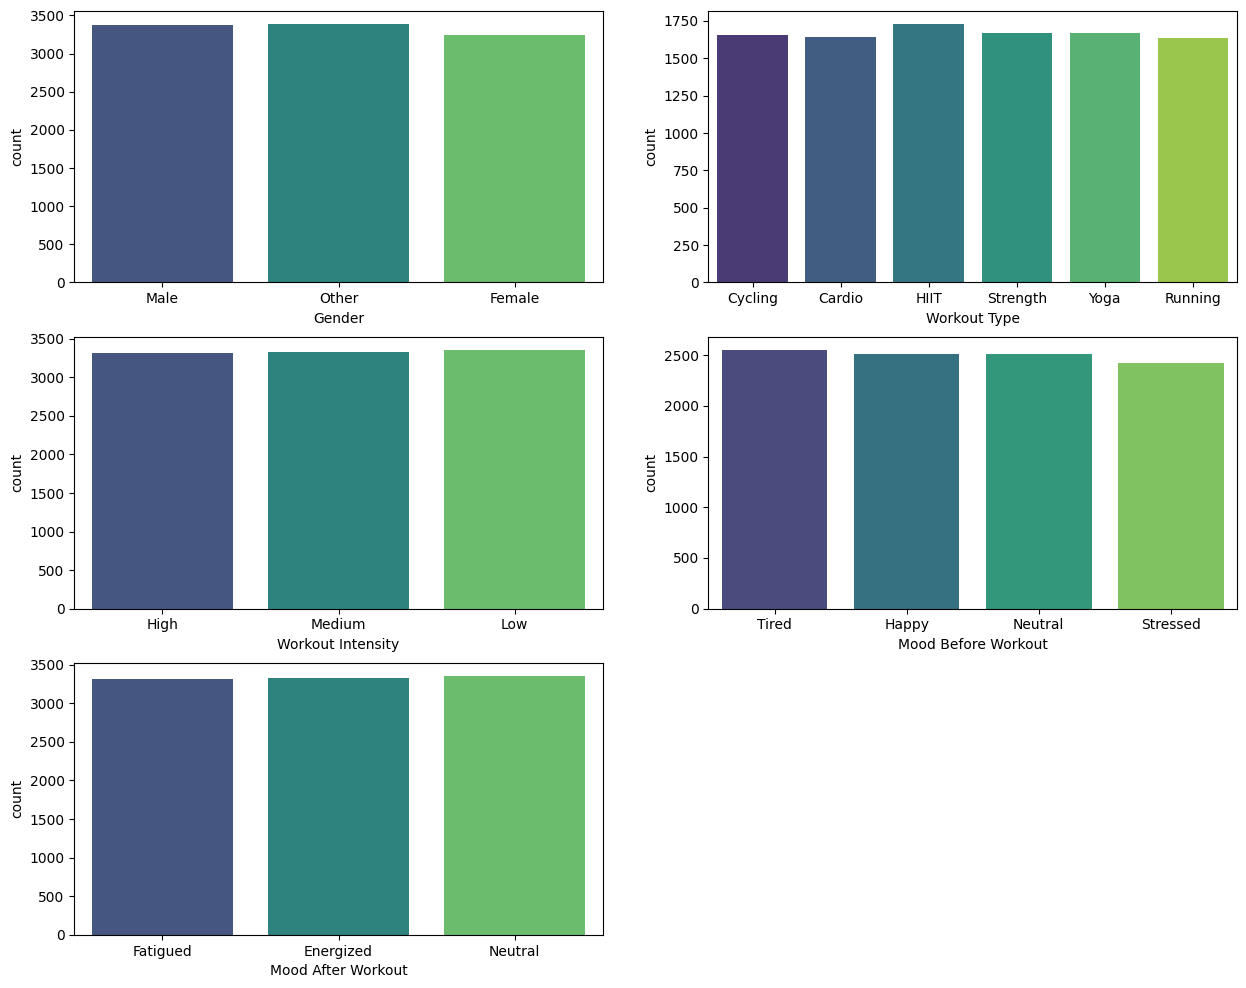

In [8]:
cat_cols = ['Gender','Workout Type','Workout Intensity','Mood Before Workout','Mood After Workout']

plt.figure(figsize = (15,12))
for i, cols in enumerate(cat_cols):
    plt.subplot(3,2,i+1)
    sns.countplot(data = df, x = cols, palette = 'viridis')

In [9]:
df.head()

,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


In [10]:
def find_your_stats(given_gender = 'na', given_age = 0, given_height = 0, given_weight = 0, given_resting_heart_rate = 0):
    new_df = df.copy()
    if given_gender != 'na':
        new_df = new_df[new_df['Gender'] == given_gender]

    if given_age != 0:
        new_df = new_df[(new_df['Age'] >= given_age - 5) & (new_df['Age'] <= given_age + 5)]

    if given_height != 0:
        new_df = new_df[(new_df['Height (cm)'] >= given_height - 5) & (new_df['Height (cm)'] <= given_height + 5)]

    if given_weight != 0:
        new_df = new_df[(new_df['Weight (kg)'] >= given_weight - 5) & (new_df['Weight (kg)'] <= given_weight + 5)]

    
    
    return new_df

In [11]:
find_your_stats(given_gender='Male').count()
df.columns

Index(['Age', 'Gender', 'Height (cm)', 'Weight (kg)', 'Workout Type',
       'Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)',
       'Steps Taken', 'Distance (km)', 'Workout Intensity', 'Sleep Hours',
       'Water Intake (liters)', 'Daily Calories Intake',
       'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)',
       'Mood Before Workout', 'Mood After Workout'],
      dtype='object')

In [25]:
print("Average Hours of Sleep for 21yo female: " + str(round(np.mean(find_your_stats(given_gender='Female', given_age=21)["Sleep Hours"]), 3)))
print("Average Hours of Sleep for 21yo male: " + str(round(np.mean(find_your_stats(given_gender='Male', given_age=21)["Sleep Hours"]), 3)))

Average Hours of Sleep for 21yo female: 6.902
Average Hours of Sleep for 21yo male: 7.117
